In [3]:
from qgis import core

In [4]:
file = "/data/SciDataHub/projects/map_validation/PM-MOO-MS-SPAApollo_01.gpkg"
layer = core.QgsVectorLayer(f"{file}|layername=subregion_fixed")

In [5]:
import sys
sys.path.append("../")

import mappy



 import mappy
 mappy logging imported
 trying geopandas imported
 geopandas imported
 matplotlib imported
 mappy plotting imported
 mappy geom_ops imported
 mappy checks imported
 mappy mappy_construct imported


In [6]:
from mappy.conversions import read_layer
import geopandas
gpd = read_layer(layer)
gpd2 = geopandas.read_file(file)

['fid', 'Unit_Code', 'Short stra', 'Unit_Name', 'RGB', 'Topology', 'Style_note', 'label', 'index', 'Id', 'Lon', 'Lat', 'Area']


In [7]:
gpd.dtypes

fid              int64
Unit_Code       object
Short stra      object
Unit_Name       object
RGB             object
Topology        object
Style_note      object
label           object
index            int64
Id               int64
Lon            float64
Lat            float64
Area           float64
geometry      geometry
dtype: object

In [8]:
gpd2.dtypes

Unit_Code       object
Short stra      object
Unit_Name       object
RGB             object
Topology        object
Style_note      object
label           object
index            int64
Id               int64
Lon            float64
Lat            float64
Area           float64
geometry      geometry
dtype: object

In [9]:
gpd

,fid,Unit_Code,Short stra,Unit_Name,RGB,Topology,Style_note,label,index,Id,Lon,Lat,Area,geometry
0,9,b'Apl_crater_collapsed_floor',b'None',b'Collapsed crater floor features',"b'(38, 115, 0)'",b'Polygon',b'None',b'Apl_crater_collapsed_floor',6,0,NaN,NaN,NaN,"MULTIPOLYGON (((187823.779 -47195.496, 189418...."
1,49,b'Apl_crater_collapsed_floor',b'None',b'Collapsed crater floor features',"b'(38, 115, 0)'",b'Polygon',b'None',b'Apl_crater_collapsed_floor',46,0,NaN,NaN,NaN,"MULTIPOLYGON (((-101876.394 324028.457, -10046..."
2,50,b'Apl_crater_collapsed_floor',b'None',b'Collapsed crater floor features',"b'(38, 115, 0)'",b'Polygon',b'None',b'Apl_crater_collapsed_floor',47,0,NaN,NaN,NaN,"MULTIPOLYGON (((38819.255 269349.327, 40034.06..."
3,53,b'Apl_crater_collapsed_floor',b'None',b'Collapsed crater floor features',"b'(38, 115, 0)'",b'Polygon',b'None',b'Apl_crater_collapsed_floor',50,0,NaN,NaN,NaN,"MULTIPOLYGON (((-106034.411 129844.271, -10520..."
4,56,b'Apl_crater_collapsed_floor',b'None',b'Collapsed crater floor features',"b'(38, 115, 0)'",b'Polygon',b'None',b'Apl_crater_collapsed_floor',53,0,NaN,NaN,NaN,"MULTIPOLYGON (((271634.914 -51704.454, 271634...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1805,b'Apl_Strat_16_pN_SPArm',b'pN_SPArm',b'pre-Nectarian SPA rim massifs',"b'(123, 118, 111)'",b'Polygon',b'None',b'Apl_Strat_16_pN_SPArm',1,0,-153.871,-23.5881,889.754,"MULTIPOLYGON (((-117783.567 337755.464, -89804..."
249,1806,b'Apl_Strat_16_pN_SPArm',b'pN_SPArm',b'pre-Nectarian SPA rim massifs',"b'(123, 118, 111)'",b'Polygon',b'None',b'Apl_Strat_16_pN_SPArm',2,0,-146.808,-25.2012,6910.100,"MULTIPOLYGON (((23566.008 337755.464, 44286.51..."
250,1807,b'Apl_Strat_16_pN_SPArm',b'pN_SPArm',b'pre-Nectarian SPA rim massifs',"b'(123, 118, 111)'",b'Polygon',b'None',b'Apl_Strat_16_pN_SPArm',3,0,-138.558,-31.7827,1775.020,"MULTIPOLYGON (((271634.914 100847.027, 271634...."
251,1813,b'Apl_Strat_16_pN_SPArm',b'pN_SPArm',b'pre-Nectarian SPA rim massifs',"b'(123, 118, 111)'",b'Polygon',b'None',b'Apl_Strat_16_pN_SPArm',9,0,-145.495,-20.1769,4888.110,"MULTIPOLYGON (((221655.459 337755.464, 229297...."


In [10]:
from mappy.geom_ops import mappy_deconstruct

points = mappy_deconstruct(gpd, "Units_name", "qua.gpkg", "lines", "points")


/usr/lib/python3.8/site-packages/numpy/core/shape_base.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  ary = asanyarray(ary)
/home/luca/.local/lib/python3.8/site-packages/topojson/ops.py:544: ShapelyDeprecationWarning: Setting the 'coords' to mutate a Geometry in place is deprecated, and will not be possible any more in Shapely 2.0
  ls.coords = ls_xy[bool_slice]
../mappy/geom_ops.py:366: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asLineString()' or 'LineStringAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'LineString()' constructor instead.
  glines = [asLineString(e) for e in out]


                           geometry  index_right0  index_right1   fid  \
0     POINT (182700.288 -60837.111)             0             0     9   
1    POINT (-100277.854 316873.186)             1             0    49   
2      POINT (40012.868 265650.168)             2             0    50   
3    POINT (-106080.842 125860.261)             3             0    53   
4     POINT (269814.681 -58426.820)             4             0    56   
..                              ...           ...           ...   ...   
254   POINT (-84856.994 331764.844)           248             0  1805   
255    POINT (80592.236 300855.934)           249             0  1806   
256    POINT (267092.075 95749.312)           250             0  1807   
257   POINT (226871.229 335657.634)           251             0  1813   
258   POINT (161393.651 322422.448)           252             0  1814   

                         Unit_Code   Short stra  \
0    b'Apl_crater_collapsed_floor'      b'None'   
1    b'Apl_crater_col

In [1]:
# points.drop("fid", axis=1).to_file("points.gpkg", layer="points", driver="GPKG")

In [2]:
# points.to_file("points.gpkg", layer="points", driver="GPKG")

In [9]:
gpd.to_file("test.gpkg", layer="test", driver="GPKG")

In [3]:
import geopandas
t1 = geopandas.read_file("/home/luca/Code/mappy.git/input_data/contacts" ,layer="contacts")

In [14]:
layer = core.QgsVectorLayer("/home/luca/aa.gpkg|layername=geomap")

In [39]:
for f in layer.fields():
    print(f.typeName())

Integer64
String
String
String
String
String
String
String
Integer64
Integer64
Real
Real
Real


In [24]:
for i in layer.getFeatures():
    print (i)
    print(i.attributes())

[9, 'Apl_crater_collapsed_floor', NULL, 'Collapsed crater floor features', '(38, 115, 0)', 'Polygon', NULL, 'Apl_crater_collapsed_floor', 6, 0, NULL, NULL, NULL]
[49, 'Apl_crater_collapsed_floor', NULL, 'Collapsed crater floor features', '(38, 115, 0)', 'Polygon', NULL, 'Apl_crater_collapsed_floor', 46, 0, NULL, NULL, NULL]
[50, 'Apl_crater_collapsed_floor', NULL, 'Collapsed crater floor features', '(38, 115, 0)', 'Polygon', NULL, 'Apl_crater_collapsed_floor', 47, 0, NULL, NULL, NULL]
[53, 'Apl_crater_collapsed_floor', NULL, 'Collapsed crater floor features', '(38, 115, 0)', 'Polygon', NULL, 'Apl_crater_collapsed_floor', 50, 0, NULL, NULL, NULL]
[56, 'Apl_crater_collapsed_floor', NULL, 'Collapsed crater floor features', '(38, 115, 0)', 'Polygon', NULL, 'Apl_crater_collapsed_floor', 53, 0, NULL, NULL, NULL]
[73, 'Apl_crater_fractured_floor', NULL, 'Floor-fractured crater floor features', '(255, 85, 0)', 'Polygon', NULL, 'Apl_crater_fractured_floor', 2, 0, NULL, NULL, NULL]
[74, 'Apl_cra

['id']


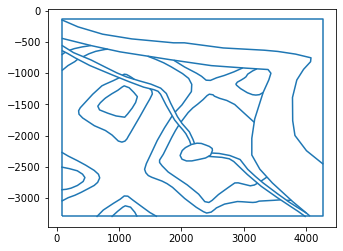

In [4]:
import shapely.wkt
import pandas as pd
from pyproj import CRS
from geopandas import GeoDataFrame

def read_layer(layer):
    names = [field.name() for field in layer.fields()]
    print(names)
    data = []
    for feature in layer.getFeatures():
        if feature.hasGeometry() is False:
            continue
        wkt = feature.geometry().asWkt()

        s = shapely.wkt.loads(wkt)
        
        my_dict = {}
        for i, a in enumerate(feature.attributes()):
            my_dict[names[i]] = a
        
        my_dict['geometry'] = s
        data.append(my_dict)
    df = pd.DataFrame(data)
    crs = CRS(int(layer.sourceCrs().geographicCrsAuthId().split(':')[1]))
    geo_df = GeoDataFrame(df, crs=crs)
    #df_by_id = dict(tuple(geo_df.groupby(trajectory_id_field)))
   
    return geo_df

tab = read_layer(layer)
tab.plot()

In [5]:
import sys
sys.path.append("../")
import mappy

In [6]:

lines = mappy.extend_lines(tab, 2)

In [7]:
lines

,id,geometry
0,NULL,LINESTRING (70.0454340926772 -138.388337994109...
1,NULL,LINESTRING (4067.65440300882 -3295.94297528673...
2,NULL,LINESTRING (2063.604535753394 -2194.9486155024...
3,NULL,LINESTRING (76.50697897266873 -549.87705033685...
4,NULL,LINESTRING (2154.417945632302 -2149.9621618826...
5,NULL,LINESTRING (635.3946540047255 -3309.0224610953...
6,NULL,LINESTRING (876.2524146421669 -3308.9479711390...
7,NULL,LINESTRING (70.70044518763464 -2265.3137362804...
8,NULL,LINESTRING (67.16833171478018 -2505.2022343256...
9,NULL,LINESTRING (1874.553663798308 -788.93642299488...


In [7]:
mappy.geom_ops.explode_all(tab.geometry)

In [68]:
tab.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

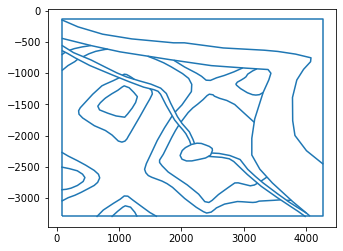

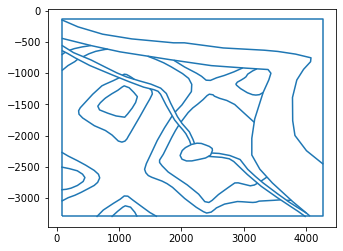

In [66]:
t1.plot()
tab.plot()

In [38]:
from shapely.geometry import LineString
import shapely

In [39]:
for feature in layer.getFeatures():

SyntaxError: unexpected EOF while parsing (<ipython-input-39-fc5b86fdabf1>, line 2)

ParseException: Expected word but encountered end of stream


WKTReadingError: Could not create geometry because of errors while reading input.